In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!ls 

20220308_2154td3_rewards.npy  20220308_2206td3_rewards.npy
20220308_2159td3_rewards.npy  log_parser.ipynb


In [7]:
def smooth(y, radius=200, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
                np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
                np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

(5000, 4)


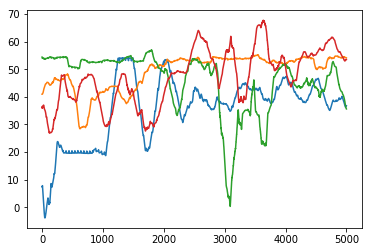

In [10]:
file = '20220308_2206td3_rewards.npy'
data = np.load(file)
print(data.shape)
max_episodes = data.shape[0]
for d in data.reshape(-1, max_episodes):
    plt.plot(smooth(d, radius=100))